<a href="https://colab.research.google.com/github/shawdaena/Artificial_intelligence_Lab/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import time
import os
import matplotlib.pyplot as plt

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Leaf_Dataset-20251021T134538Z-1-001.zip to Leaf_Dataset-20251021T134538Z-1-001.zip


In [18]:
uploaded.keys()

dict_keys(['Leaf_Dataset-20251021T134538Z-1-001.zip'])

In [19]:
import zipfile

# তোমার uploaded ZIP ফাইলের সঠিক নাম দাও এখানে
zip_path = "/content/Leaf_Dataset-20251021T134538Z-1-001.zip"
extract_path = "/content/Leaf_Dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the extracted folder contents
print(os.listdir(extract_path))

['Leaf_Dataset']


In [20]:
# Step 1: Mount Google Drive (already done, but included for completeness)
# drive.mount('/content/drive')

# Define paths
base_dir = '/content/Leaf_Dataset/Leaf_Dataset'
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testing')


In [21]:
# Step 3: Set up ImageDataGenerator for preprocessing and augmentation

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation/Test datagen
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Step 4: Create data generators
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)


Found 906 images belonging to 2 classes.
Found 112 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [23]:
# Define the CNN model
inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)


# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

EPOCHS = 30

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Total Training Time: {training_time:.2f} seconds")
print(f"Average Time per Epoch: {training_time / len(history.history['loss']):.2f} seconds")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.5427 - loss: 0.7825 - val_accuracy: 0.5446 - val_loss: 0.6885
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5529 - loss: 0.6880 - val_accuracy: 0.6696 - val_loss: 0.6693
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5663 - loss: 0.6718 - val_accuracy: 0.5982 - val_loss: 0.6571
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6605 - loss: 0.6491 - val_accuracy: 0.5893 - val_loss: 0.6489
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6428 - loss: 0.6332 - val_accuracy: 0.5357 - val_loss: 0.6663
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6620 - loss: 0.6059 - val_accuracy: 0.6161 - val_loss: 0.6236
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.7019 - loss: 0.5861 - val_accuracy: 0.6071 - val_loss: 0.6587
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7186 - loss: 0.5426 - val_accuracy: 0.6429 - val_loss:

In [25]:
# Save training history

model.save(os.path.join(base_dir, 'cnn_binary_classification_model.h5'))

# Print final performance
print("\nFinal Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])


Final Training Accuracy: 0.9028697609901428
Final Validation Accuracy: 0.8303571343421936
Final Training Loss: 0.22505095601081848
Final Validation Loss: 0.4747321605682373


In [26]:
# Load Model
model_path = os.path.join(base_dir, 'cnn_binary_classification_model.h5')
model = tf.keras.models.load_model(model_path)

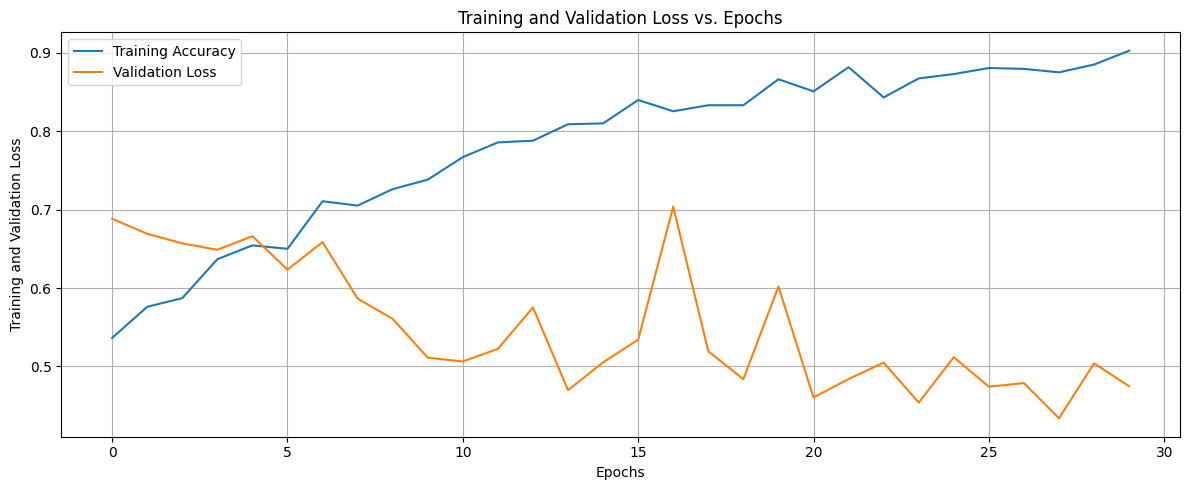

In [27]:
# Step 1: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Loss plot
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig(plot_path_acc_loss)
plt.show()


Found 113 images belonging to 2 classes.


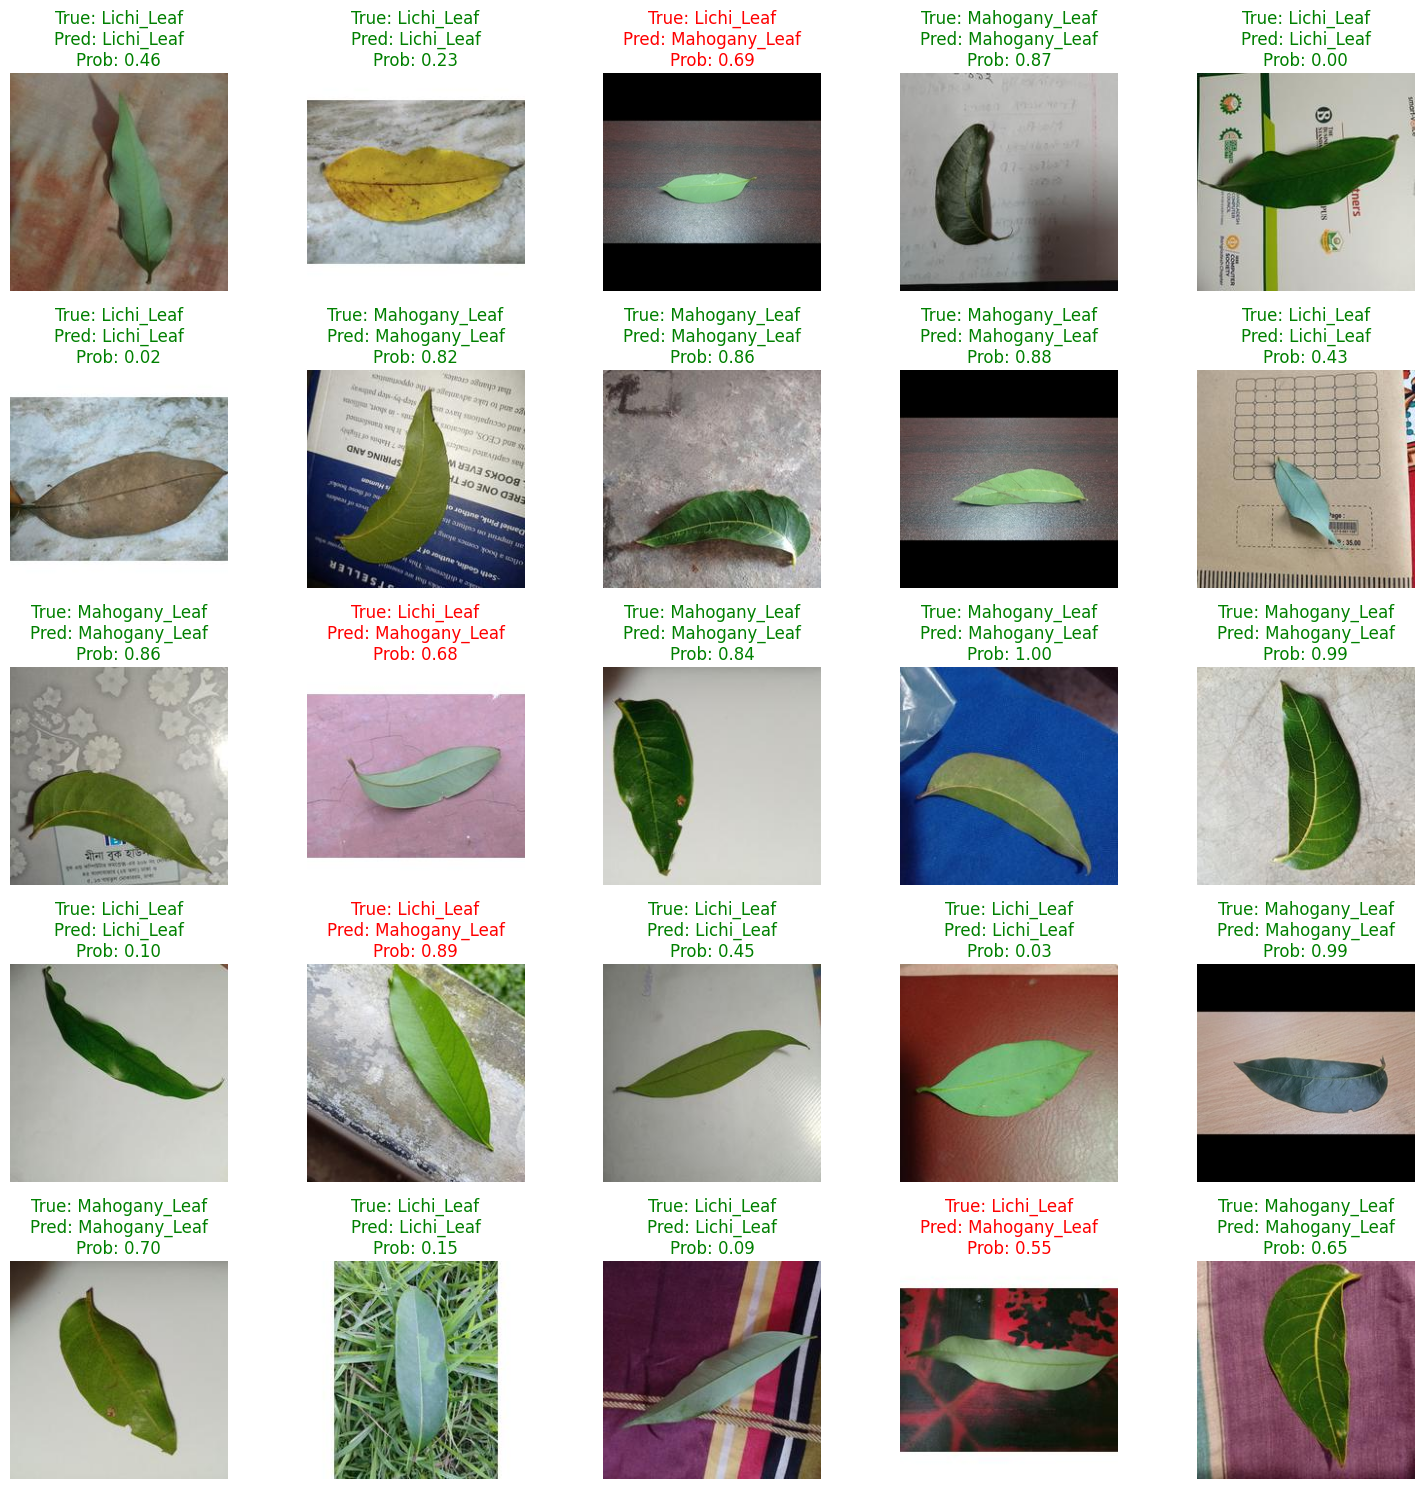

In [28]:
# Step 2: Visualize test predictions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'testing'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

# Load model
# model = tf.keras.models.load_model(model_path)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Collect 25 test samples
test_generator.reset()
images = []
true_labels = []
predictions = []
num_samples = 25
samples_collected = 0

while samples_collected < num_samples:
    batch_images, batch_labels = next(test_generator)
    batch_preds = model.predict(batch_images, verbose=0)
    for i in range(len(batch_images)):
        if samples_collected < num_samples:
            images.append(batch_images[i])
            true_labels.append(batch_labels[i])
            predictions.append(batch_preds[i][0].item())  # Extract scalar
            samples_collected += 1
        else:
            break

# Plot 5x5 grid
plt.figure(figsize=(15, 15))
for i in range(num_samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    true_label = class_names[int(true_labels[i])]
    pred_label = class_names[int(predictions[i] > 0.5)]
    prob = predictions[i]
    title = f'True: {true_label}\nPred: {pred_label}\nProb: {prob:.2f}'
    plt.title(title, color='green' if true_label == pred_label else 'red')
    plt.axis('off')
plt.tight_layout()
# plt.savefig(plot_path_test_samples)
plt.show()